In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
df_poke = pd.read_excel('pokemon_data_tratado.xlsx')
df_poke

,Unnamed: 0,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Is_legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,0
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,0
3,3,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,0
4,4,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1030,618,Stunfisk Galarian Stunfisk,Ground,Steel,471,109,81,99,66,84,32,0
1031,1031,628,Braviary Hisuian Braviary,Psychic,Flying,510,110,83,70,112,70,65,0
1032,1032,705,Sliggoo Hisuian Sliggoo,Steel,Dragon,452,58,75,83,83,113,40,0
1033,1033,706,Goodra Hisuian Goodra,Steel,Dragon,600,80,100,100,110,150,60,0


In [242]:
df_poke.dtypes

Unnamed: 0       int64
Pokedex ID       int64
Name            object
Type_1          object
Type_2          object
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Is_legendary     int64
dtype: object

In [243]:
df_poke.isnull().sum()

Unnamed: 0      0
Pokedex ID      0
Name            0
Type_1          0
Type_2          0
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Is_legendary    0
dtype: int64

In [244]:
x = df_poke.drop(labels='Is_legendary', axis=1)
y = df_poke['Is_legendary'].values

In [245]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column_name in x:
    column_dtype = x[column_name].dtype
    if column_dtype == 'object':
        x[column_name] = label_encoder.fit_transform(x[column_name])

df_testinho = pd.DataFrame(x)
display(df_testinho)

,Unnamed: 0,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,1,91,9,13,318,45,49,49,65,65,45
1,1,2,427,9,13,405,60,62,63,80,80,60
2,2,3,959,9,13,525,80,82,83,100,100,80
3,3,4,118,6,6,309,39,52,43,60,50,65
4,4,5,119,6,6,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1030,618,864,10,16,471,109,81,99,66,84,32
1031,1031,628,82,14,7,510,110,83,70,112,70,65
1032,1032,705,815,16,2,452,58,75,83,83,113,40
1033,1033,706,347,16,2,600,80,100,100,110,150,60


In [246]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

preprocessador = ColumnTransformer(verbose_feature_names_out = False, remainder = 'passthrough', transformers = [('Standard', StandardScaler(), make_column_selector(dtype_include=['int']))])

x_pre = preprocessador.fit_transform(x)
display(x_pre)

array([[-1.73037814, -1.65931559, -1.42580481, ..., -0.1591169 ,
        -0.17084737, -0.78262369],
       [-1.72703118, -1.65592545, -0.30122637, ...,  0.34533274,
         0.41454336, -0.26484338],
       [-1.72368422, -1.6525353 ,  1.47935616, ...,  1.01793228,
         1.19506433,  0.42553037],
       ...,
       [ 1.72368422,  0.72734429,  0.99739397, ...,  0.44622267,
         1.70240296, -0.95521712],
       [ 1.72703118,  0.73073444, -0.56898314, ...,  1.35423204,
         3.14636676, -0.26484338],
       [ 1.73037814,  0.79175699, -1.09780276, ...,  0.84978239,
         0.99993409, -0.26484338]])

In [247]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_pre,y,random_state=81105, test_size=0.25)

In [248]:
from sklearn import tree

classificador_gini = tree.DecisionTreeClassifier(criterion='gini')

classificador_gini.fit(x_treino, y_treino)

DecisionTreeClassifier()

[Text(0.46875, 0.9444444444444444, 'Total <= 1.303\ngini = 0.164\nsamples = 776\nvalue = [706, 70]\nclass = 0'),
 Text(0.16666666666666666, 0.8333333333333334, 'Total <= -1.98\ngini = 0.011\nsamples = 692\nvalue = [688, 4]\nclass = 0'),
 Text(0.08333333333333333, 0.7222222222222222, 'Pokedex ID <= 0.939\ngini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = 0'),
 Text(0.041666666666666664, 0.6111111111111112, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = 0'),
 Text(0.125, 0.6111111111111112, 'Unnamed: 0 <= 0.889\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.25, 0.7222222222222222, 'HP <= 0.489\ngini = 0.009\nsamples = 680\nvalue = [677, 3]\nclass = 0'),
 Text(0.20833333333333334, 0.6111111111111112, 'gini = 0.0\nsamples = 521\nvalue = [521, 0]\nclass = 0'),
 Text(0.2916666666666667, 0.61111111

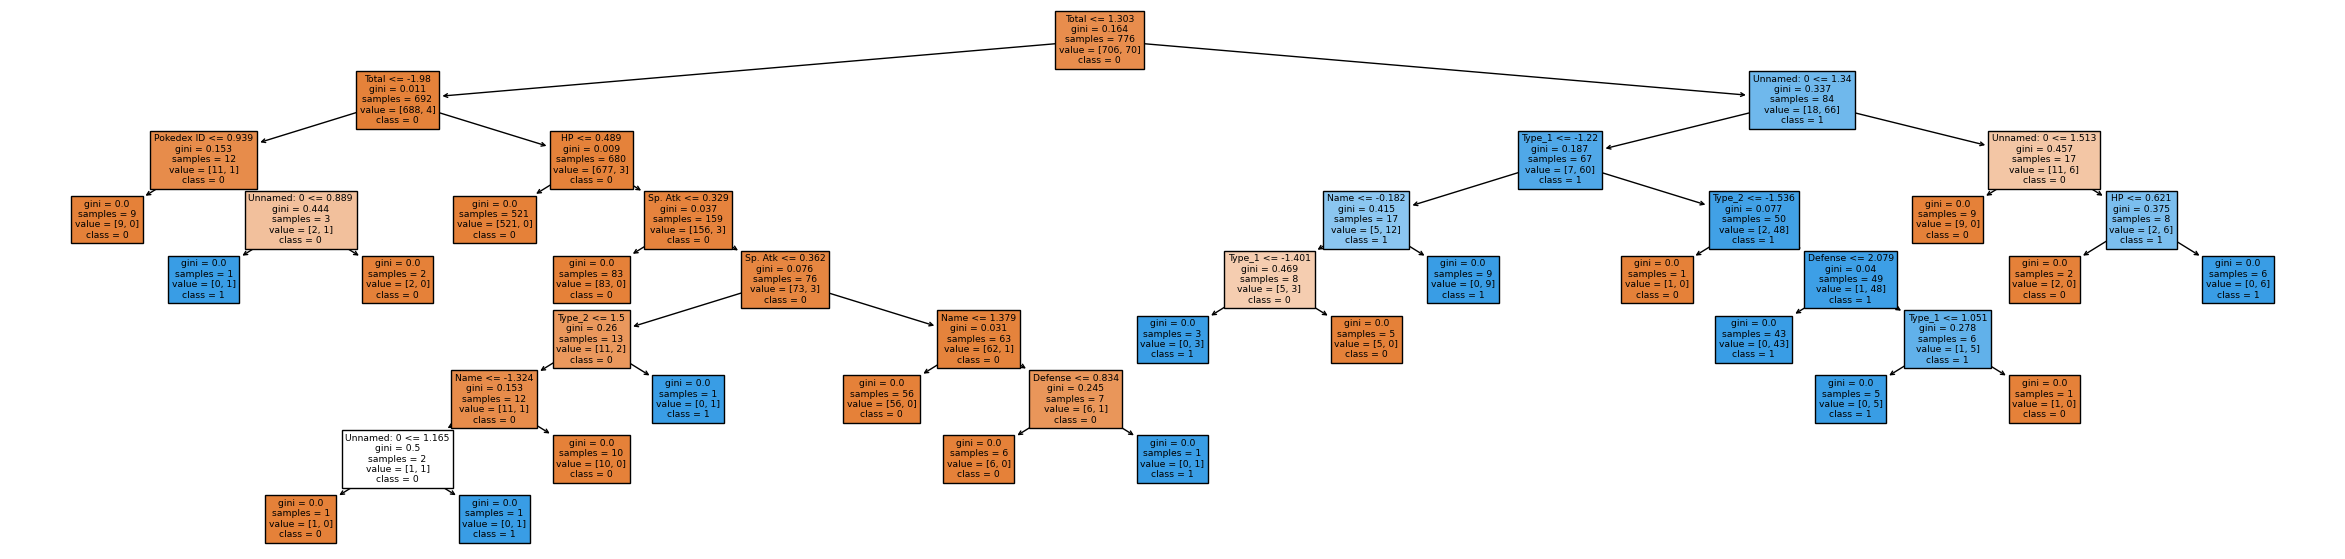

In [249]:
plt.figure(figsize=(30,7))
tree.plot_tree(
    classificador_gini,
    feature_names=x.columns.astype(str),
    class_names=classificador_gini.classes_.astype(str),
    filled=True
)

In [250]:
from sklearn.metrics import accuracy_score

resp_treino_gini = classificador_gini.predict(x_treino)

print('Gini:', accuracy_score(y_treino, resp_treino_gini))

Gini: 1.0


<AxesSubplot: >

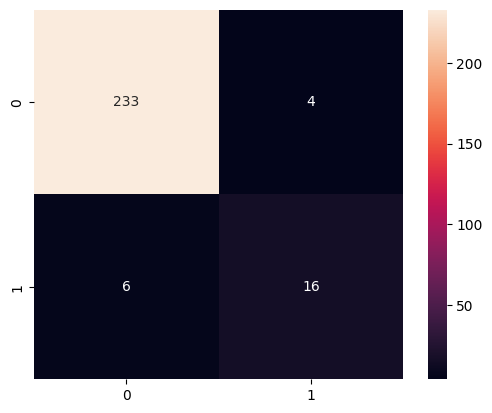

In [251]:
y_pred = classificador_gini.predict(x_teste)

from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_gini.classes_, xticklabels = classificador_gini.classes_,fmt = 'd')

In [252]:
path = classificador_gini.cost_complexity_pruning_path(x_treino, y_treino)

ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.00093179 0.00126236 0.00242373 0.00373596 0.00386598
 0.00614008 0.01028827 0.11743771]


In [253]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'ccp_alpha': ccp_alphas
}

grid = GridSearchCV(classificador_gini, parametros, cv=5)
grid.fit(x_treino, y_treino)

print(f"Melhor valor de k: {grid.best_params_['ccp_alpha']}")
print(f"Melhor classificador: {grid.best_estimator_}")
print(f"Melhor score (médio): {grid.best_score_*100:.2f}%")

classificador_gini = grid.best_estimator_
classificador_gini.fit(x_treino, y_treino)

Melhor valor de k: 0.003865979381443299
Melhor classificador: DecisionTreeClassifier(ccp_alpha=0.003865979381443299)
Melhor score (médio): 97.68%


DecisionTreeClassifier(ccp_alpha=0.003865979381443299)

[Text(0.3333333333333333, 0.875, 'Total <= 1.303\ngini = 0.164\nsamples = 776\nvalue = [706, 70]\nclass = 0'),
 Text(0.16666666666666666, 0.625, 'gini = 0.011\nsamples = 692\nvalue = [688, 4]\nclass = 0'),
 Text(0.5, 0.625, 'Unnamed: 0 <= 1.34\ngini = 0.337\nsamples = 84\nvalue = [18, 66]\nclass = 1'),
 Text(0.3333333333333333, 0.375, 'gini = 0.187\nsamples = 67\nvalue = [7, 60]\nclass = 1'),
 Text(0.6666666666666666, 0.375, 'Unnamed: 0 <= 1.513\ngini = 0.457\nsamples = 17\nvalue = [11, 6]\nclass = 0'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = 0'),
 Text(0.8333333333333334, 0.125, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]\nclass = 1')]

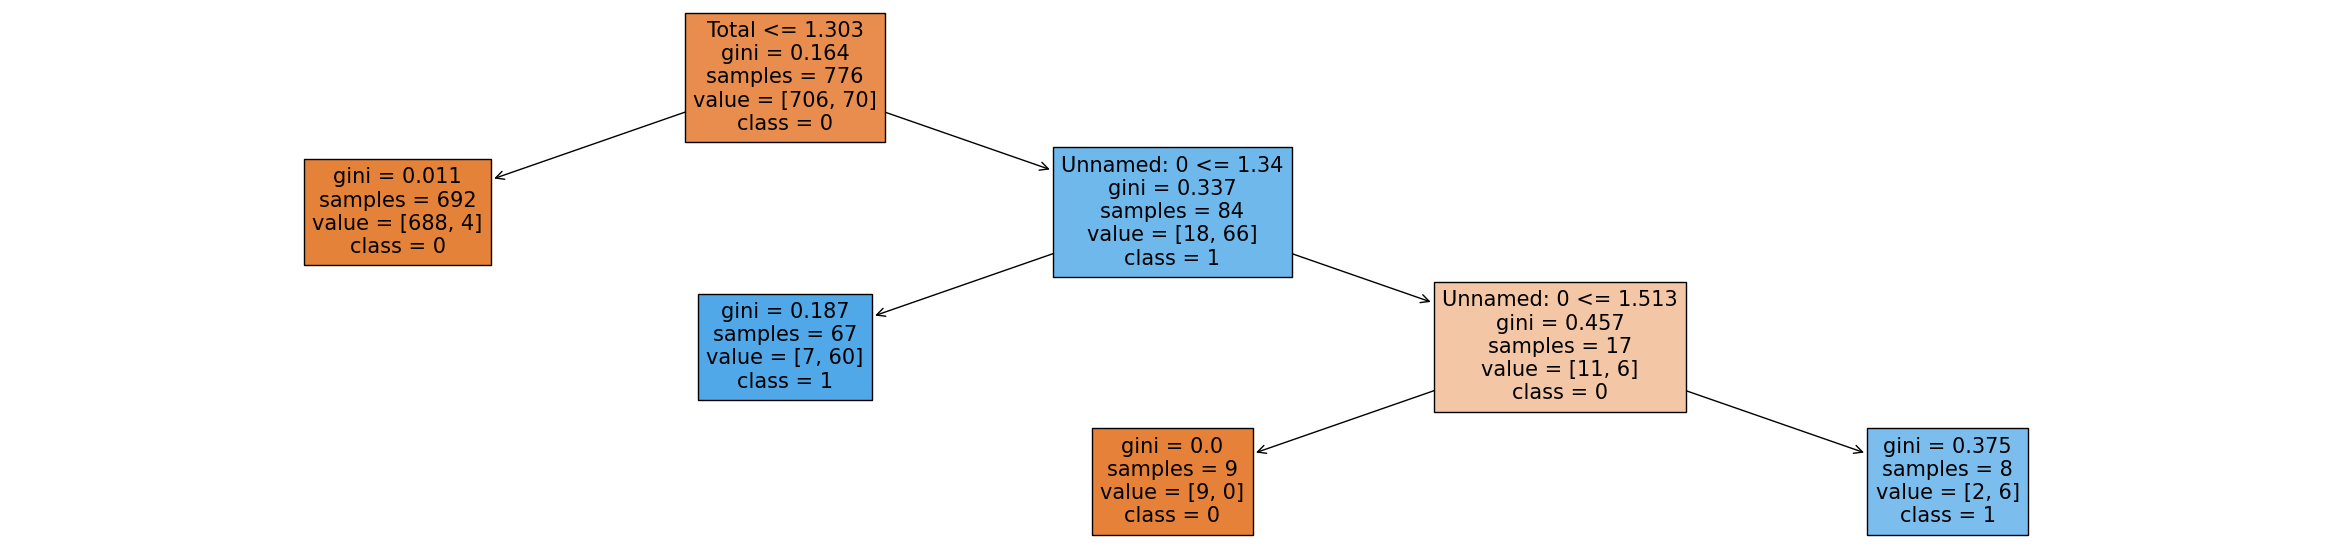

In [254]:
alpha = grid.best_params_['ccp_alpha']

classificador_ccp = tree.DecisionTreeClassifier(ccp_alpha=alpha)
classificador_ccp.fit(x_treino, y_treino)

y_pred = classificador_ccp.predict(x_teste)

plt.figure(figsize=(30,7))
tree.plot_tree(
    classificador_ccp,
    feature_names=x.columns.astype(str),
    class_names=classificador_ccp.classes_.astype(str),
    filled=True
)

<AxesSubplot: >

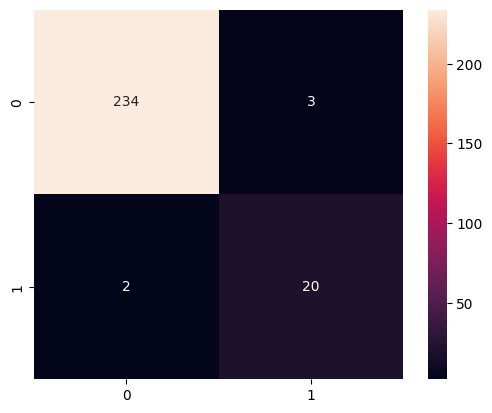

In [255]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_ccp.classes_, xticklabels = classificador_ccp.classes_,fmt = 'd')

In [256]:
from sklearn.metrics import classification_report

report = classification_report(y_teste, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       237
           1       0.87      0.91      0.89        22

    accuracy                           0.98       259
   macro avg       0.93      0.95      0.94       259
weighted avg       0.98      0.98      0.98       259



In [257]:
import pickle
import hashlib
import hmac
import os
from dotenv import load_dotenv

load_dotenv()

chave = bytes(os.getenv('senha'), 'utf-8')

In [258]:
def serializar_assinar(modelo, chave, arquivo):    
    modelo_serializado = pickle.dumps(modelo)

    assinatura = hmac.new(chave, modelo_serializado, hashlib.sha256).digest()

    dados_assinados = modelo_serializado + assinatura

    arquivo.write(dados_assinados)
    
with open('modelo_serializado.pickle', 'wb') as arquivo:
    serializar_assinar(classificador_ccp, chave, arquivo)